<h1>p2_team 4 - Bermuda</h1>

<h2>Team Members</h2>

<p>Roger Hahn, Pedro Nunez, Ninoslav Vasic, Troy Draizen</p>

<h2>Project scope:</h2>



<h1>S&amp;P 500 sentiment analysis from newsapi based on:</h1>

<ol>
<li><p>S&amp;P 500 - news - Headlines</p></li>
<li><p>CNBCs Jim Cramer - statements - news headlines on S&amp;P 500</p></li>
<li><p>US President Donald Trump - statements - news headlines on S&amp;P 500</p></li>


should add alll others
</ol>



<h1>Initial imports</h1>

In [10]:
!pip install nltk
!pip install newsapi


import nltk
import os
import pandas as pd
#import newsapi

In [11]:
#from newsapi.newsapi_client import NewsApiClient
from newsapi import newsapi_client

In [12]:
%matplotlib inline

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.downloader.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/troydraizen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
import string
from string import punctuation
from nltk.corpus import reuters, stopwords
from newsapi import NewsApiClient
from datetime import date, datetime, timedelta

ImportError: cannot import name 'NewsApiClient' from 'newsapi' (/Users/troydraizen/opt/anaconda3/lib/python3.7/site-packages/newsapi/__init__.py)

# News Headlines Sentiment

Based on the news api we  pulled the latest news articles for S&P 500 and create a DataFrame of sentiment scores. 



In [ ]:
# Read your api key environment variable

api_key = "3e339c6e32a94b3bb83af5dd6c0bc07b"
#len(api_key)


In [ ]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [7]:
# set date range for downloading headlines
start_date = date.today() - timedelta(weeks=10)# ahere we can input exact timing we want to download data for, in days....
end_date = date.today() - timedelta(days=6)

print(f"""
start date: {start_date}

end date: {end_date}
"""
)

NameError: name 'date' is not defined

In [8]:
# Fetch the S&P500 news articles

#SP500_headlines = newsapi.get_sources()
SP500_headlines = newsapi.get_everything(q="S&P 500", page_size=50,language="en", sort_by="relevancy")

# Fetch data on S&P 500 by Jim Cramer statements

cramer_SP500_headlines = newsapi.get_everything(q=" Jim Cramer AND S&P 500", page_size=50,language="en", sort_by="relevancy")

# Fetch data on S&P 500 by Donald Trump statements
potus_SP500_headlines = newsapi.get_everything(q=" Donald Trump AND S&P 500", page_size=50,language="en", sort_by="relevancy")

# Fetch data on S&P 500 by Jamie Dimon statements
dimon_SP500_headlines = newsapi.get_everything(q=" Jamie Dimon AND S&P 500", page_size=50,language="en", sort_by="relevancy")

# Fetch data on S&P 500 by Lloyd Blankfein statements
blankfein_SP500_headlines = newsapi.get_everything(q="Lloyd Blankfein AND S&P 500", page_size=50,language="en", sort_by="relevancy")

# Fetch data on S&P 500 by David Solomon statements
solomon_SP500_headlines = newsapi.get_everything(q="David Solomon AND S&P 500", page_size=50,language="en", sort_by="relevancy")

# Fetch data on S&P 500 by Michael Corbat statements
corbat_SP500_headlines = newsapi.get_everything(q="Michael Corbat AND S&P 500", page_size=50,language="en", sort_by="relevancy")

# Fetch data on S&P 500 by lead economists statements
economists_SP500_headlines = newsapi.get_everything(q="Lead Economists AND S&P 500", page_size=50,language="en", sort_by="relevancy")

# Fetch data on S&P 500 by Jerome Powel statements
powel_SP500_headlines = newsapi.get_everything(q="Jerome Powel AND S&P 500", page_size=50,language="en", sort_by="relevancy")

# Fetch data on S&P 500 by FED statements
fed_SP500_headlines = newsapi.get_everything(q="FED AND S&P 500", page_size=50,language="en", sort_by="relevancy")

# Fetch data on S&P 500 by Larry Fink statements
fink_SP500_headlines = newsapi.get_everything(q="Larry Fink AND S&P 500", page_size=50,language="en", sort_by="relevancy")




NameError: name 'newsapi' is not defined

In [9]:
# Print all publshed articles about S&P500
print(f"Total number of articles about S&P 500: {SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on Jim Cramer statements
print(f"Total number of articles about S&P 500 by Jim Cramer: {cramer_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on Donald Trump statements
print(f"Total number of articles about S&P 500 by Donald Trump: {potus_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on Jamie Dimon statements
print(f"Total number of articles about S&P 500 by Jamie Dimon: {dimon_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on Lloyd Blankfein statements
print(f"Total number of articles about S&P 500 by Lloyd Blankfein: {blankfein_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on David Solomon statements
print(f"Total number of articles about S&P 500 by David Solomon: {solomon_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on Michael Corbat statements
print(f"Total number of articles about S&P 500 by Michael Corbat: {corbat_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on lead economists statements
print(f"Total number of articles about S&P 500 by lead economists: {economists_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on Jerome Powel statements
print(f"Total number of articles about S&P 500 by Jerome Powel: {powel_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on FED statements
print(f"Total number of articles about S&P 500 by FED officials: {fed_SP500_headlines['totalResults']}")

# Print all publshed articles about S&P500 based on larry Fink statements
print(f"Total number of articles about S&P 500 by Larry Fink: {fink_SP500_headlines['totalResults']}")

NameError: name 'SP500_headlines' is not defined

In [302]:
# Create the S&P sentiment scores DataFrame
SP500_sentiments = []

for sp500_article in SP500_headlines["articles"]:
    try:
        text = sp500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        SP500_sentiments.append({
            "SP500 Text": text,
            "SP500 Compound": compound,
            "SP500 Positive": pos,
            "SP500 Negative": neg,
            "SP500 Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
SP500_df = pd.DataFrame(SP500_sentiments)

# Reorder DataFrame columns
cols = ["SP500 Compound","SP500 Negative","SP500 Neutral","SP500 Positive","SP500 Text"]
SP500_df = SP500_df[cols]

SP500_df.head()

,SP500 Compound,SP500 Negative,SP500 Neutral,SP500 Positive,SP500 Text
0,-0.7906,0.154,0.846,0.000,it was another brutal day on wall street as in...
1,0.7184,0.032,0.817,0.151,the stock market’s movements in recent weeks h...
2,-0.7579,0.140,0.860,0.000,the first quarter of 2020 ended with a whimper...
3,-0.7003,0.124,0.876,0.000,americans are starting to lose their jobs in r...
4,-0.2263,0.038,0.962,0.000,the dow and s&amp;p 500 both fell more than 20...


In [303]:
# Create the Jim Cramer S&P sentiment scores DataFrame
cramer_SP500_sentiments = []

for cramer_sp500_article in cramer_SP500_headlines["articles"]:
    try:
        text = cramer_sp500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        cramer_SP500_sentiments.append({
            "Cramer Text": text,
            "Cramer Compound": compound,
            "Cramer Positive": pos,
            "Cramer Negative": neg,
            "Cramer Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
cramer_SP500_df = pd.DataFrame(cramer_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Cramer Compound","Cramer Negative","Cramer Neutral","Cramer Positive","Cramer Text"]
cramer_SP500_df = cramer_SP500_df[cols]

cramer_SP500_df.head()

,Cramer Compound,Cramer Negative,Cramer Neutral,Cramer Positive,Cramer Text
0,0.5859,0.000,0.866,0.134,shares of many growth stocks skyrocketed on th...
1,-0.3612,0.052,0.948,0.000,traders at the new york stock exchange. photo ...
2,0.7506,0.000,0.837,0.163,the dow jones industrial average finished frid...
3,0.0000,0.000,1.000,0.000,trader works on the floor of the new york stoc...
4,-0.7506,0.141,0.859,0.000,this article was originally published by tyler...


In [304]:
# Create the Donald Trump S&P sentiment scores DataFrame
potus_SP500_sentiments = []

for potus_sp500_article in potus_SP500_headlines["articles"]:
    try:
        text = potus_sp500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        potus_SP500_sentiments.append({
            "Trump Text": text,
            "Trump Compound": compound,
            "Trump Positive": pos,
            "Trump Negative": neg,
            "Trump Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
potus_SP500_df = pd.DataFrame(potus_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Trump Compound","Trump Negative","Trump Neutral","Trump Positive","Trump Text"]
potus_SP500_df = potus_SP500_df[cols]

potus_SP500_df.head()

,Trump Compound,Trump Negative,Trump Neutral,Trump Positive,Trump Text
0,0.0000,0.000,1.000,0.000,wall street came roaring back tuesday with all...
1,-0.7906,0.154,0.846,0.000,it was another brutal day on wall street as in...
2,-0.1531,0.034,0.966,0.000,"the trump stock rally, which at its peak only ..."
3,-0.2960,0.051,0.949,0.000,the rollercoaster ride of equity markets conti...
4,-0.0258,0.038,0.926,0.036,after yesterday’s news that the u.s. automaker...


In [305]:
# Create the Jamie Dimon sentiment scores DataFrame
dimon_SP500_sentiments = []

for dimon_SP500_article in dimon_SP500_headlines["articles"]:
    try:
        text = dimon_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        dimon_SP500_sentiments.append({
            "Dimon Text": text,
            "Dimon Compound": compound,
            "Dimon Positive": pos,
            "Dimon Negative": neg,
            "Dimon Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
dimon_SP500_df = pd.DataFrame(dimon_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Dimon Compound","Dimon Negative","Dimon Neutral","Dimon Positive","Dimon Text"]
dimon_SP500_df = dimon_SP500_df[cols]

dimon_SP500_df.head()

,Dimon Compound,Dimon Negative,Dimon Neutral,Dimon Positive,Dimon Text
0,-0.7579,0.178,0.761,0.061,as covid-19 spreads around the world — devasta...
1,-0.1531,0.081,0.873,0.046,as the coronavirus epidemic gathers steam in m...
2,-0.0644,0.054,0.898,0.048,"the s&amp;p 500, dow jones industrial average ..."
3,-0.0129,0.091,0.839,0.071,investors are seeing light at the end of the t...
4,-0.7845,0.154,0.846,0.000,dimon expects financial stress similar to the ...


In [306]:
# Create the Lloyd Blankfein sentiment scores DataFrame
blankfein_SP500_sentiments = []

for blankfein_SP500_article in blankfein_SP500_headlines["articles"]:
    try:
        text = blankfein_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        blankfein_SP500_sentiments.append({
            "Blankfein Text": text,
            "Blankfein Compound": compound,
            "Blankfein Positive": pos,
            "Blankfein Negative": neg,
            "Blankfein Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
blankfein_SP500_df = pd.DataFrame(blankfein_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Blankfein Compound","Blankfein Negative","Blankfein Neutral","Blankfein Positive","Blankfein Text"]
blankfein_SP500_df = blankfein_SP500_df[cols]

blankfein_SP500_df.head()

,Blankfein Compound,Blankfein Negative,Blankfein Neutral,Blankfein Positive,Blankfein Text
0,0.6249,0.000,0.873,0.127,david solomon “led our development of the firm...
1,0.7003,0.029,0.823,0.148,even as the us stock market continued its free...
2,-0.8555,0.234,0.766,0.000,london/sydney/hong kong: financial markets aro...
3,-0.7650,0.178,0.822,0.000,london/sydney/hong kong (reuters) - financial ...
4,0.0000,0.000,1.000,0.000,us stocks dropped on monday despite the federa...


In [307]:
# Create the David Solomon sentiment scores DataFrame
solomon_SP500_sentiments = []

for solomon_SP500_article in solomon_SP500_headlines["articles"]:
    try:
        text = solomon_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        solomon_SP500_sentiments.append({
            "Solomon Text": text,
            "Solomon Compound": compound,
            "Solomon Positive": pos,
            "Solomon Negative": neg,
            "Solomon Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
solomon_SP500_df = pd.DataFrame(solomon_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Solomon Compound","Solomon Negative","Solomon Neutral","Solomon Positive","Solomon Text"]
solomon_SP500_df = solomon_SP500_df[cols]

solomon_SP500_df.head()

,Solomon Compound,Solomon Negative,Solomon Neutral,Solomon Positive,Solomon Text
0,0.6249,0.000,0.873,0.127,david solomon “led our development of the firm...
1,0.7003,0.029,0.823,0.148,even as the us stock market continued its free...
2,0.3182,0.000,0.949,0.051,"in this episode of rule breaker investing, dav..."
3,0.5106,0.000,0.930,0.070,editors note: morning money is a free version ...
4,-0.6808,0.097,0.903,0.000,president donald trump said hed make a stateme...


In [308]:
# Create the Michael Corbat sentiment scores DataFrame
corbat_SP500_sentiments = []

for corbat_SP500_article in corbat_SP500_headlines["articles"]:
    try:
        text = corbat_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        corbat_SP500_sentiments.append({
            "Corbat Text": text,
            "Corbat Compound": compound,
            "Corbat Positive": pos,
            "Corbat Negative": neg,
            "Corbat Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
corbat_SP500_df = pd.DataFrame(corbat_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Corbat Compound","Corbat Negative","Corbat Neutral","Corbat Positive","Corbat Text"]
corbat_SP500_df = corbat_SP500_df[cols]

corbat_SP500_df.head()

,Corbat Compound,Corbat Negative,Corbat Neutral,Corbat Positive,Corbat Text
0,0.0772,0.055,0.862,0.082,the covid-19 crash has engulfed the big financ...
1,0.8176,0.000,0.805,0.195,by elizabeth dilts marshall and steve holland\...
2,-0.6808,0.097,0.903,0.000,president donald trump said hed make a stateme...
3,0.2263,0.125,0.752,0.123,happy wednesday and welcome back to on the mon...
4,0.3182,0.000,0.949,0.051,"a man cleans up on the trading floor, followin..."


In [309]:
# Create the lead economists sentiment scores DataFrame
economists_SP500_sentiments = []

for economists_SP500_article in economists_SP500_headlines["articles"]:
    try:
        text = economists_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        economists_SP500_sentiments.append({
            "Lead economists Text": text,
            "Lead economists Compound": compound,
            "Lead economists Positive": pos,
            "Lead economists Negative": neg,
            "Lead economists Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
economists_SP500_df = pd.DataFrame(economists_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Lead economists Compound","Lead economists Negative","Lead economists Neutral","Lead economists Positive","Lead economists Text"]
economists_SP500_df = economists_SP500_df[cols]

economists_SP500_df.head()

,Lead economists Compound,Lead economists Negative,Lead economists Neutral,Lead economists Positive,Lead economists Text
0,-0.1531,0.081,0.873,0.046,as the coronavirus epidemic gathers steam in m...
1,0.0000,0.063,0.852,0.085,new york (reuters) - the number of americans f...
2,-0.7579,0.140,0.860,0.000,the outbreak of covid-19 has been declared a p...
3,0.8126,0.000,0.833,0.167,new york: wall street closed out its best week...
4,-0.9110,0.296,0.649,0.054,new york (reuters) - the coronavirus shockwave...


In [312]:
# Create the Jerome Powel sentiment scores DataFrame
powel_SP500_sentiments = []

for powel_SP500_article in powel_SP500_headlines["articles"]:
    try:
        text = powel_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        powel_SP500_sentiments.append({
            "Powell Text": text,
            "Powell Compound": compound,
            "Powell Positive": pos,
            "Powell Negative": neg,
            "Powell Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
powel_SP500_df = pd.DataFrame(powel_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Powell Compound","Powell Negative","Powell Neutral","Powell Positive","Powell Text"]
powel_SP500_df = powel_SP500_df[cols]

powel_SP500_df.head()

,Powell Compound,Powell Negative,Powell Neutral,Powell Positive,Powell Text
0,0.6652,0.039,0.823,0.138,"wolf richter wolfstreet.com, www.amazon.com/au..."


In [314]:
# Create the FED officials sentiment scores DataFrame
fed_SP500_sentiments = []

for fed_SP500_article in fed_SP500_headlines["articles"]:
    try:
        text = fed_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        fed_SP500_sentiments.append({
            "FED Text": text,
            "FED Compound": compound,
            "FED Positive": pos,
            "FED Negative": neg,
            "FED Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
fed_SP500_df = pd.DataFrame(fed_SP500_sentiments)

# Reorder DataFrame columns
cols = ["FED Compound","FED Negative","FED Neutral","FED Positive","FED Text"]
fed_SP500_df = fed_SP500_df[cols]

fed_SP500_df.head()

,FED Compound,FED Negative,FED Neutral,FED Positive,FED Text
0,0.1027,0.048,0.895,0.057,new york (reuters) - the s&amp;p 500 .spx open...
1,0.6652,0.035,0.809,0.156,the problem with any authoritarian regime is t...
2,-0.1154,0.045,0.920,0.036,"stocks sink into the red at the open, failing ..."
3,0.5106,0.000,0.926,0.074,u.s. equity futures are pointing to a higher o...
4,0.5070,0.000,0.932,0.068,our robot colleague satoshi nakaboto writes ab...


In [315]:
# Create the Larry Fink sentiment scores DataFrame
fink_SP500_sentiments = []

for fink_SP500_article in fink_SP500_headlines["articles"]:
    try:
        text = fink_SP500_article["content"].lower()    
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        fink_SP500_sentiments.append({
            "Fink Text": text,
            "Fink Compound": compound,
            "Fink Positive": pos,
            "Fink Negative": neg,
            "Fink Neutral": neu,  
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
fink_SP500_df = pd.DataFrame(fink_SP500_sentiments)

# Reorder DataFrame columns
cols = ["Fink Compound","Fink Negative","Fink Neutral","Fink Positive","Fink Text"]
fink_SP500_df = fink_SP500_df[cols]

fink_SP500_df.head()

,Fink Compound,Fink Negative,Fink Neutral,Fink Positive,Fink Text
0,-0.5563,0.097,0.903,0.000,with the un pushing to cut greenhouse emission...
1,-0.0772,0.082,0.867,0.052,investment management giant blackrock inc.\r\n...
2,-0.1280,0.084,0.863,0.053,the controversial stock buyback has met its mo...
3,0.6808,0.000,0.874,0.126,before the covid-19 pandemic took over captain...
4,0.1280,0.043,0.903,0.055,alex wong/getty images\r\n<ul><li>top executiv...


In [316]:
!pip install numpy
import numpy as np

In [317]:
all_500_df = pd.concat([SP500_df, cramer_SP500_df, potus_SP500_df, dimon_SP500_df, blankfein_SP500_df, solomon_SP500_df, corbat_SP500_df, 
                        economists_SP500_df, powel_SP500_df,fed_SP500_df,fink_SP500_df])
all_500_df = all_500_df.replace(np.nan, 0)
all_500_df

,SP500 Compound,SP500 Negative,SP500 Neutral,SP500 Positive,SP500 Text,Cramer Compound,Cramer Negative,Cramer Neutral,Cramer Positive,Cramer Text,...,FED Compound,FED Negative,FED Neutral,FED Positive,FED Text,Fink Compound,Fink Negative,Fink Neutral,Fink Positive,Fink Text
0,-0.7906,0.154,0.846,0.000,it was another brutal day on wall street as in...,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0000,0.0,0.000,0.000,0
1,0.7184,0.032,0.817,0.151,the stock market’s movements in recent weeks h...,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0000,0.0,0.000,0.000,0
2,-0.7579,0.140,0.860,0.000,the first quarter of 2020 ended with a whimper...,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0000,0.0,0.000,0.000,0
3,-0.7003,0.124,0.876,0.000,americans are starting to lose their jobs in r...,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0000,0.0,0.000,0.000,0
4,-0.2263,0.038,0.962,0.000,the dow and s&amp;p 500 both fell more than 20...,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0000,0.0,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.0000,0.000,0.000,0.000,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.7506,0.0,0.853,0.147,as investors prepare for the 2020 proxy voting...
14,0.0000,0.000,0.000,0.000,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0000,0.0,1.000,0.000,going linux · show notes\r\n2020 episodes:\r\n...
15,0.0000,0.000,0.000,0.000,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.0000,0.0,1.000,0.000,going linux · show notes\r\n2020 episodes:\r\n...
16,0.0000,0.000,0.000,0.000,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0,0.4404,0.0,0.913,0.087,coronavirus impact\r\nan increasing wave of co...


In [ ]:
#If needed
#UPON A DECISION  POLYNOMIAL OR GET DUMMIES
#all_500_df_dummy = pd.get_dummies(all_500_df)
#all_500_df_dummy

In [319]:
all_500_df.describe()

,SP500 Compound,SP500 Negative,SP500 Neutral,SP500 Positive,Cramer Compound,Cramer Negative,Cramer Neutral,Cramer Positive,Trump Compound,Trump Negative,...,Powell Neutral,Powell Positive,FED Compound,FED Negative,FED Neutral,FED Positive,Fink Compound,Fink Negative,Fink Neutral,Fink Positive
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,-0.031159,0.012754,0.125196,0.005742,-0.029415,0.011534,0.128507,0.006581,-0.021038,0.012654,...,0.002413,0.000405,0.000360,0.009871,0.126384,0.010372,0.012001,0.002384,0.045765,0.004636
std,0.199487,0.044534,0.307870,0.023048,0.198616,0.040026,0.312410,0.027817,0.209182,0.045568,...,0.044568,0.007473,0.176303,0.034915,0.307438,0.033805,0.102261,0.014374,0.194808,0.024255
min,-0.959000,0.000000,0.000000,0.000000,-0.962300,0.000000,0.000000,0.000000,-0.959000,0.000000,...,0.000000,0.000000,-0.858800,0.000000,0.000000,0.000000,-0.556300,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.718400,0.340000,1.000000,0.156000,0.920900,0.401000,1.000000,0.271000,0.891700,0.340000,...,0.823000,0.138000,0.891700,0.298000,1.000000,0.218000,0.936600,0.128000,1.000000,0.250000


In [267]:
# Describe the S&P 500 Sentiment
SP500_df.describe() 

,SP500 Compound,SP500 Negative,SP500 Neutral,SP500 Positive
count,49.000000,49.000000,49.000000,49.000000
mean,-0.251986,0.092082,0.869673,0.038224
std,0.502294,0.085894,0.088631,0.048077
min,-0.959000,0.000000,0.649000,0.000000
25%,-0.718400,0.034000,0.825000,0.000000
50%,-0.250000,0.057000,0.880000,0.000000
75%,0.025800,0.140000,0.932000,0.061000
max,0.718400,0.340000,1.000000,0.156000


In [320]:
# Describe the S&P 500 Sentiment by Jim Cramer 
fed_SP500_df.describe()

,FED Compound,FED Negative,FED Neutral,FED Positive
count,50.000000,50.000000,50.000000,50.000000
mean,0.002456,0.067320,0.861940,0.070740
std,0.464405,0.067175,0.094322,0.059764
min,-0.858800,0.000000,0.566000,0.000000
25%,-0.340000,0.000000,0.816750,0.007500
50%,0.000000,0.057500,0.875000,0.062500
75%,0.441375,0.096500,0.934750,0.109500
max,0.891700,0.298000,1.000000,0.218000


In [321]:
# Describe the S&P 500 Sentiment by Donald Trump 
potus_SP500_df.describe()

,Trump Compound,Trump Negative,Trump Neutral,Trump Positive
count,50.000000,50.000000,50.000000,50.000000
mean,-0.143482,0.086300,0.857060,0.056580
std,0.534503,0.089007,0.093934,0.061533
min,-0.959000,0.000000,0.660000,0.000000
25%,-0.553625,0.000000,0.801500,0.000000
50%,-0.138600,0.058500,0.865500,0.044000
75%,0.165425,0.150500,0.940250,0.095000
max,0.891700,0.340000,1.000000,0.227000


---

# Tokenizer

In this section, we used NLTK and Python to tokenize the text for each option. 
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [322]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [323]:
# Expand the default stopwords list if necessary
stop_words_ = {'cat','char', 'ha','u','wa', 'dead'}

In [324]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    sw = set(stopwords.words('english'))
     # Remove the non-alpha characters # Substitute everything that is NOT a letter with empty string
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
   
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    #convert to lower case and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(stop_words_)]
    
    return tokens
        


In [325]:
# Create a new tokens column for S&P 500
SP500_tokens = SP500_df.copy()
tokenized = []
for i in SP500_tokens['SP500 Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'SP500  tokens':tokenized_articles})

SP500_tokens_df= pd.DataFrame(tokenized)
SP500_tokens['SP500  Tokens'] = SP500_tokens_df 

SP500_tokens.head()

,SP500 Compound,SP500 Negative,SP500 Neutral,SP500 Positive,SP500 Text,SP500 Tokens
0,-0.7906,0.154,0.846,0.000,it was another brutal day on wall street as in...,"[another, brutal, day, wall, street, investor,..."
1,0.7184,0.032,0.817,0.151,the stock market’s movements in recent weeks h...,"[stock, market, movement, recent, week, often,..."
2,-0.7579,0.140,0.860,0.000,the first quarter of 2020 ended with a whimper...,"[first, quarter, ended, whimper, dow, jones, i..."
3,-0.7003,0.124,0.876,0.000,americans are starting to lose their jobs in r...,"[american, starting, lose, job, response, coro..."
4,-0.2263,0.038,0.962,0.000,the dow and s&amp;p 500 both fell more than 20...,"[dow, sampp, fell, recent, high, wednesday, li..."


In [326]:
# Create a new tokens column for S&P 500 by Jim Cramer

cramer_SP500_tokens = cramer_SP500_df.copy()
tokenized = []
for i in cramer_SP500_tokens['Cramer Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Cramer tokens':tokenized_articles})

cramer_SP500_tokens_df= pd.DataFrame(tokenized)
cramer_SP500_tokens['Cramer Tokens'] = cramer_SP500_tokens_df 

cramer_SP500_tokens.head()

,Cramer Compound,Cramer Negative,Cramer Neutral,Cramer Positive,Cramer Text,Cramer Tokens
0,0.5859,0.000,0.866,0.134,shares of many growth stocks skyrocketed on th...,"[share, many, growth, stock, skyrocketed, thur..."
1,-0.3612,0.052,0.948,0.000,traders at the new york stock exchange. photo ...,"[trader, new, york, stock, exchange, photo, jo..."
2,0.7506,0.000,0.837,0.163,the dow jones industrial average finished frid...,"[dow, jones, industrial, average, finished, fr..."
3,0.0000,0.000,1.000,0.000,trader works on the floor of the new york stoc...,"[trader, work, floor, new, york, stock, exchan..."
4,-0.7506,0.141,0.859,0.000,this article was originally published by tyler...,"[article, originally, published, tyler, durden..."


In [327]:
# Create a new tokens column for S&P 500 by Donald Trump

potus_SP500_tokens = potus_SP500_df.copy()
tokenized = []
for i in potus_SP500_tokens['Trump Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Trump tokens':tokenized_articles})

potus_SP500_tokens_df= pd.DataFrame(tokenized)
potus_SP500_tokens['Trump Tokens'] = potus_SP500_tokens_df 

potus_SP500_tokens.head()

,Trump Compound,Trump Negative,Trump Neutral,Trump Positive,Trump Text,Trump Tokens
0,0.0000,0.000,1.000,0.000,wall street came roaring back tuesday with all...,"[wall, street, came, roaring, back, tuesday, m..."
1,-0.7906,0.154,0.846,0.000,it was another brutal day on wall street as in...,"[another, brutal, day, wall, street, investor,..."
2,-0.1531,0.034,0.966,0.000,"the trump stock rally, which at its peak only ...","[trump, stock, rally, peak, last, month, seeme..."
3,-0.2960,0.051,0.949,0.000,the rollercoaster ride of equity markets conti...,"[rollercoaster, ride, equity, market, continue..."
4,-0.0258,0.038,0.926,0.036,after yesterday’s news that the u.s. automaker...,"[yesterday, news, automaker, would, temporaril..."


In [328]:
# Create a new tokens column for S&P 500 by Jaimie Dimon

dimon_SP500_tokens = dimon_SP500_df.copy()
tokenized = []
for i in dimon_SP500_tokens['Dimon Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Dimon tokens':tokenized_articles})

dimon_SP500_tokens_df= pd.DataFrame(tokenized)
dimon_SP500_tokens['Dimon Tokens'] = dimon_SP500_tokens_df 

dimon_SP500_tokens.head()

,Dimon Compound,Dimon Negative,Dimon Neutral,Dimon Positive,Dimon Text,Dimon Tokens
0,-0.7579,0.178,0.761,0.061,as covid-19 spreads around the world — devasta...,"[covid, spread, around, world, devastating, ec..."
1,-0.1531,0.081,0.873,0.046,as the coronavirus epidemic gathers steam in m...,"[coronavirus, epidemic, gather, steam, many, p..."
2,-0.0644,0.054,0.898,0.048,"the s&amp;p 500, dow jones industrial average ...","[sampp, dow, jones, industrial, average, nasda..."
3,-0.0129,0.091,0.839,0.071,investors are seeing light at the end of the t...,"[investor, seeing, light, end, tunnel, brutal,..."
4,-0.7845,0.154,0.846,0.000,dimon expects financial stress similar to the ...,"[dimon, expects, financial, stress, similar, c..."


In [329]:
# Create a new tokens column for S&P 500 by Lloyd Blankfein 

blankfein_SP500_tokens = blankfein_SP500_df.copy()
tokenized = []
for i in blankfein_SP500_tokens['Blankfein Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Blankfein tokens':tokenized_articles})

blankfein_SP500_tokens_df= pd.DataFrame(tokenized)
blankfein_SP500_tokens['Blankfein Tokens'] = blankfein_SP500_tokens_df 

blankfein_SP500_tokens.head()

,Blankfein Compound,Blankfein Negative,Blankfein Neutral,Blankfein Positive,Blankfein Text,Blankfein Tokens
0,0.6249,0.000,0.873,0.127,david solomon “led our development of the firm...,"[david, solomon, led, development, firm, three..."
1,0.7003,0.029,0.823,0.148,even as the us stock market continued its free...,"[even, stock, market, continued, freefall, due..."
2,-0.8555,0.234,0.766,0.000,london/sydney/hong kong: financial markets aro...,"[londonsydneyhong, kong, financial, market, ar..."
3,-0.7650,0.178,0.822,0.000,london/sydney/hong kong (reuters) - financial ...,"[londonsydneyhong, kong, reuters, financial, m..."
4,0.0000,0.000,1.000,0.000,us stocks dropped on monday despite the federa...,"[stock, dropped, monday, despite, federal, res..."


In [330]:
# Create a new tokens column for S&P 500 by David Solomon

solomon_SP500_tokens = solomon_SP500_df.copy()
tokenized = []
for i in solomon_SP500_tokens['Solomon Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Solomon tokens':tokenized_articles})

solomon_SP500_tokens_df= pd.DataFrame(tokenized)
solomon_SP500_tokens['Solomon Tokens'] = solomon_SP500_tokens_df 

solomon_SP500_tokens.head()

,Solomon Compound,Solomon Negative,Solomon Neutral,Solomon Positive,Solomon Text,Solomon Tokens
0,0.6249,0.000,0.873,0.127,david solomon “led our development of the firm...,"[david, solomon, led, development, firm, three..."
1,0.7003,0.029,0.823,0.148,even as the us stock market continued its free...,"[even, stock, market, continued, freefall, due..."
2,0.3182,0.000,0.949,0.051,"in this episode of rule breaker investing, dav...","[episode, rule, breaker, investing, david, gar..."
3,0.5106,0.000,0.930,0.070,editors note: morning money is a free version ...,"[editor, note, morning, money, free, version, ..."
4,-0.6808,0.097,0.903,0.000,president donald trump said hed make a stateme...,"[president, donald, trump, said, hed, make, st..."


In [331]:
# Create a new tokens column for S&P 500 by Michael Corbat

corbat_SP500_tokens = corbat_SP500_df.copy()
tokenized = []
for i in corbat_SP500_tokens['Corbat Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Corbat tokens':tokenized_articles})

corbat_SP500_tokens_df= pd.DataFrame(tokenized)
corbat_SP500_tokens['Corbat Tokens'] = corbat_SP500_tokens_df 

corbat_SP500_tokens.head()

,Corbat Compound,Corbat Negative,Corbat Neutral,Corbat Positive,Corbat Text,Corbat Tokens
0,0.0772,0.055,0.862,0.082,the covid-19 crash has engulfed the big financ...,"[covid, crash, engulfed, big, financials, incl..."
1,0.8176,0.000,0.805,0.195,by elizabeth dilts marshall and steve holland\...,"[elizabeth, dilts, marshall, steve, hollandnew..."
2,-0.6808,0.097,0.903,0.000,president donald trump said hed make a stateme...,"[president, donald, trump, said, hed, make, st..."
3,0.2263,0.125,0.752,0.123,happy wednesday and welcome back to on the mon...,"[happy, wednesday, welcome, back, money, wonde..."
4,0.3182,0.000,0.949,0.051,"a man cleans up on the trading floor, followin...","[man, clean, trading, floor, following, trader..."


In [332]:
# Create a new tokens column for S&P 500 by lead economists

economists_SP500_tokens = economists_SP500_df.copy()
tokenized = []
for i in economists_SP500_tokens['Lead economists Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Lead economists tokens':tokenized_articles})

economists_SP500_tokens_df= pd.DataFrame(tokenized)
economists_SP500_tokens['Lead economists Tokens'] = economists_SP500_tokens_df 

economists_SP500_tokens.head()

,Lead economists Compound,Lead economists Negative,Lead economists Neutral,Lead economists Positive,Lead economists Text,Lead economists Tokens
0,-0.1531,0.081,0.873,0.046,as the coronavirus epidemic gathers steam in m...,"[coronavirus, epidemic, gather, steam, many, p..."
1,0.0000,0.063,0.852,0.085,new york (reuters) - the number of americans f...,"[new, york, reuters, number, american, filing,..."
2,-0.7579,0.140,0.860,0.000,the outbreak of covid-19 has been declared a p...,"[outbreak, covid, declared, pandemic, world, h..."
3,0.8126,0.000,0.833,0.167,new york: wall street closed out its best week...,"[new, york, wall, street, closed, best, week, ..."
4,-0.9110,0.296,0.649,0.054,new york (reuters) - the coronavirus shockwave...,"[new, york, reuters, coronavirus, shockwaves, ..."


In [335]:
# Create a new tokens column for S&P 500 by Jerome Powel

powel_SP500_tokens = powel_SP500_df.copy()
tokenized = []
for i in powel_SP500_tokens['Powell Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Powell tokens':tokenized_articles})

powel_SP500_tokens_df= pd.DataFrame(tokenized)
powel_SP500_tokens['Powell Tokens'] = powel_SP500_tokens_df 

powel_SP500_tokens.head()

,Powell Compound,Powell Negative,Powell Neutral,Powell Positive,Powell Text,Powell Tokens
0,0.6652,0.039,0.823,0.138,"wolf richter wolfstreet.com, www.amazon.com/au...","[wolf, richter, wolfstreetcom, wwwamazoncomaut..."


In [336]:
# Create a new tokens column for S&P 500 by FED officials

fed_SP500_tokens = fed_SP500_df.copy()
tokenized = []
for i in fed_SP500_tokens['FED Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'FED tokens':tokenized_articles})

fed_SP500_tokens_df= pd.DataFrame(tokenized)
fed_SP500_tokens['FED Tokens'] = fed_SP500_tokens_df 

fed_SP500_tokens.head()

,FED Compound,FED Negative,FED Neutral,FED Positive,FED Text,FED Tokens
0,0.1027,0.048,0.895,0.057,new york (reuters) - the s&amp;p 500 .spx open...,"[new, york, reuters, sampp, spx, opened, lower..."
1,0.6652,0.035,0.809,0.156,the problem with any authoritarian regime is t...,"[problem, authoritarian, regime, depend, compe..."
2,-0.1154,0.045,0.920,0.036,"stocks sink into the red at the open, failing ...","[stock, sink, red, open, failing, maintain, pr..."
3,0.5106,0.000,0.926,0.074,u.s. equity futures are pointing to a higher o...,"[equity, future, pointing, higher, open, wall,..."
4,0.5070,0.000,0.932,0.068,our robot colleague satoshi nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [337]:
# Create a new tokens column for S&P 500 by Larry Fink

fink_SP500_tokens = fink_SP500_df.copy()
tokenized = []
for i in fink_SP500_tokens['Fink Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'Fink tokens':tokenized_articles})

fink_SP500_tokens_df= pd.DataFrame(tokenized)
fink_SP500_tokens['FED Tokens'] = fink_SP500_tokens_df 

fink_SP500_tokens.head()

,Fink Compound,Fink Negative,Fink Neutral,Fink Positive,Fink Text,FED Tokens
0,-0.5563,0.097,0.903,0.000,with the un pushing to cut greenhouse emission...,"[un, pushing, cut, greenhouse, emission, perce..."
1,-0.0772,0.082,0.867,0.052,investment management giant blackrock inc.\r\n...,"[investment, management, giant, blackrock, inc..."
2,-0.1280,0.084,0.863,0.053,the controversial stock buyback has met its mo...,"[controversial, stock, buyback, met, formidabl..."
3,0.6808,0.000,0.874,0.126,before the covid-19 pandemic took over captain...,"[covid, pandemic, took, captain, industry, que..."
4,0.1280,0.043,0.903,0.055,alex wong/getty images\r\n<ul><li>top executiv...,"[alex, wonggetty, imagesullitop, executive, so..."


In [338]:
all_tokens_df = pd.concat([SP500_tokens, cramer_SP500_tokens, potus_SP500_tokens, dimon_SP500_tokens, blankfein_SP500_tokens, solomon_SP500_tokens, 
                           corbat_SP500_tokens, economists_SP500_tokens, powel_SP500_tokens, fed_SP500_tokens, fink_SP500_tokens])

all_tokens_df= all_tokens_df.replace(np.nan, 0)
all_tokens_df

,SP500 Compound,SP500 Negative,SP500 Neutral,SP500 Positive,SP500 Text,SP500 Tokens,Cramer Compound,Cramer Negative,Cramer Neutral,Cramer Positive,...,FED Negative,FED Neutral,FED Positive,FED Text,FED Tokens,Fink Compound,Fink Negative,Fink Neutral,Fink Positive,Fink Text
0,-0.7906,0.154,0.846,0.000,it was another brutal day on wall street as in...,"[another, brutal, day, wall, street, investor,...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0000,0.0,0.000,0.000,0
1,0.7184,0.032,0.817,0.151,the stock market’s movements in recent weeks h...,"[stock, market, movement, recent, week, often,...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0000,0.0,0.000,0.000,0
2,-0.7579,0.140,0.860,0.000,the first quarter of 2020 ended with a whimper...,"[first, quarter, ended, whimper, dow, jones, i...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0000,0.0,0.000,0.000,0
3,-0.7003,0.124,0.876,0.000,americans are starting to lose their jobs in r...,"[american, starting, lose, job, response, coro...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0000,0.0,0.000,0.000,0
4,-0.2263,0.038,0.962,0.000,the dow and s&amp;p 500 both fell more than 20...,"[dow, sampp, fell, recent, high, wednesday, li...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0000,0.0,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.0000,0.000,0.000,0.000,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,"[investor, prepare, proxy, voting, season, try...",0.7506,0.0,0.853,0.147,as investors prepare for the 2020 proxy voting...
14,0.0000,0.000,0.000,0.000,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,"[going, linux, show, note, episodesmar, linux,...",0.0000,0.0,1.000,0.000,going linux · show notes\r\n2020 episodes:\r\n...
15,0.0000,0.000,0.000,0.000,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,"[going, linux, show, note, episodesmar, linux,...",0.0000,0.0,1.000,0.000,going linux · show notes\r\n2020 episodes:\r\n...
16,0.0000,0.000,0.000,0.000,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,"[coronavirus, impactan, increasing, wave, comp...",0.4404,0.0,0.913,0.087,coronavirus impact\r\nan increasing wave of co...


In [341]:
#cleaning the database for polynomial features if we decide to use it
all_ = all_500_df.drop(columns =['SP500 Text', 'Cramer Text', 'Trump Text', 'Dimon Text', 'Blankfein Text', 
                                 'Solomon Text', 'Corbat Text', 'Lead economists Text', 'Powell Text', 'FED Text', 'Fink Text'])


In [284]:
!pip install sklearn
import sklearn

In [342]:
#UPON A DECISION  POLYNOMIAL OR GET DUMMIES
#in case we wanted to use as a preporcesing polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
print(poly.fit_transform(all_))



[[ 1.       -0.7906    0.154    ...  0.        0.        0.      ]
 [ 1.        0.7184    0.032    ...  0.        0.        0.      ]
 [ 1.       -0.7579    0.14     ...  0.        0.        0.      ]
 ...
 [ 1.        0.        0.       ...  1.        0.        0.      ]
 [ 1.        0.        0.       ...  0.833569  0.079431  0.007569]
 [ 1.        0.        0.       ...  0.727609  0.125391  0.021609]]


---

# NGrams and Frequency Analysis

In this section we are looking at the ngrams and word frequency for each option. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each option. 

In [344]:
from collections import Counter
from nltk import ngrams

In [345]:
# Generate the S&P 500 N-grams where N=2
SP500_words_all = []
for text in SP500_tokens['SP500  Tokens']:
    for word in text:
        SP500_words_all.append(word)
SP500_word_counts = Counter(ngrams(SP500_words_all, n=2))
SP500_word_counts.most_common(10)

[(('wall', 'street'), 7),
 (('dow', 'jones'), 6),
 (('jones', 'industrial'), 5),
 (('industrial', 'average'), 5),
 (('president', 'donald'), 5),
 (('donald', 'trump'), 5),
 (('new', 'york'), 5),
 (('stock', 'market'), 4),
 (('first', 'quarter'), 4),
 (('york', 'reuters'), 4)]

In [346]:
# Generate the S&P 500 N-grams where N=2 by FED officials
fed_SP500_words_all = []
for text in fed_SP500_tokens['FED Tokens']:
    for word in text:
        fed_SP500_words_all.append(word)
fed_SP500_word_counts = Counter(ngrams(fed_SP500_words_all, n=2))
fed_SP500_word_counts.most_common(10)

[(('federal', 'reserve'), 21),
 (('central', 'bank'), 6),
 (('coronavirus', 'pandemic'), 5),
 (('dow', 'jones'), 5),
 (('jones', 'industrial'), 5),
 (('industrial', 'average'), 5),
 (('stock', 'market'), 5),
 (('new', 'york'), 4),
 (('stock', 'future'), 4),
 (('wall', 'street'), 4)]

In [347]:
# Generate the S&P 500 N-grams where N=2 by Donald Trump
potus_SP500_words_all = []
for text in potus_SP500_tokens['Trump Tokens']:
    for word in text:
        potus_SP500_words_all.append(word)
potus_SP500_word_counts = Counter(ngrams(potus_SP500_words_all, n=2))
potus_SP500_word_counts.most_common(10)

[(('president', 'donald'), 12),
 (('donald', 'trump'), 12),
 (('dow', 'jones'), 9),
 (('jones', 'industrial'), 8),
 (('industrial', 'average'), 7),
 (('wall', 'street'), 6),
 (('stock', 'index'), 6),
 (('stock', 'market'), 5),
 (('coronavirus', 'pandemic'), 5),
 (('financial', 'market'), 4)]

In [348]:
# Generate the S&P 500 N-grams where N=2 by Jamie Dimon
dimon_SP500_words_all = []
for text in dimon_SP500_tokens['Dimon Tokens']:
    for word in text:
        dimon_SP500_words_all.append(word)
dimon_SP500_word_counts = Counter(ngrams(dimon_SP500_words_all, n=3))
dimon_SP500_word_counts.most_common(10)

[(('dow', 'jones', 'industrial'), 4),
 (('jones', 'industrial', 'average'), 4),
 (('president', 'donald', 'trump'), 4),
 (('wall', 'street', 'executive'), 4),
 (('difference', 'biden', 'trump'), 4),
 (('yorkwashington', 'reuters', 'president'), 3),
 (('reuters', 'president', 'donald'), 3),
 (('donald', 'trump', 'meet'), 3),
 (('trump', 'meet', 'wall'), 3),
 (('meet', 'wall', 'street'), 3)]

In [349]:
# Generate the S&P 500 N-grams where N=2 by Lloyd Blankfein
blankfein_SP500_words_all = []
for text in blankfein_SP500_tokens['Blankfein Tokens']:
    for word in text:
        blankfein_SP500_words_all.append(word)
blankfein_SP500_word_counts = Counter(ngrams(blankfein_SP500_words_all, n=3))
blankfein_SP500_word_counts.most_common(10)

[(('monday', 'rising', 'tide'), 5),
 (('rising', 'tide', 'national'), 5),
 (('lockdown', 'threatened', 'overwhelm'), 5),
 (('threatened', 'overwhelm', 'policymakers'), 5),
 (('overwhelm', 'policymakers', 'frantic'), 5),
 (('policymakers', 'frantic', 'effort'), 5),
 (('frantic', 'effort', 'cushion'), 5),
 (('effort', 'cushion', 'likely'), 5),
 (('cushion', 'likely', 'deep'), 5),
 (('likely', 'deep', 'global'), 5)]

In [350]:
# Generate the S&P 500 N-grams where N=2 by David Solomon
solomon_SP500_words_all = []
for text in solomon_SP500_tokens['Solomon Tokens']:
    for word in text:
        solomon_SP500_words_all.append(word)
solomon_SP500_word_counts = Counter(ngrams(solomon_SP500_words_all, n=3))
solomon_SP500_word_counts.most_common(10)

[(('million', 'cash', 'bonus'), 2),
 (('david', 'solomon', 'led'), 1),
 (('solomon', 'led', 'development'), 1),
 (('led', 'development', 'firm'), 1),
 (('development', 'firm', 'threeyear'), 1),
 (('firm', 'threeyear', 'business'), 1),
 (('threeyear', 'business', 'plan'), 1),
 (('business', 'plan', 'clear'), 1),
 (('plan', 'clear', 'longterm'), 1),
 (('clear', 'longterm', 'strategy'), 1)]

In [351]:
# Generate the S&P 500 N-grams where N=2 by Michael Corbat
corbat_SP500_words_all = []
for text in corbat_SP500_tokens['Corbat Tokens']:
    for word in text:
        corbat_SP500_words_all.append(word)
corbat_SP500_word_counts = Counter(ngrams(corbat_SP500_words_all, n=2))
corbat_SP500_word_counts.most_common(10)

[(('wall', 'street'), 2),
 (('new', 'york'), 2),
 (('covid', 'crash'), 1),
 (('crash', 'engulfed'), 1),
 (('engulfed', 'big'), 1),
 (('big', 'financials'), 1),
 (('financials', 'including'), 1),
 (('including', 'well'), 1),
 (('well', 'fargo'), 1),
 (('fargo', 'wfcone'), 1)]

In [352]:
# Generate the S&P 500 N-grams where N=2 by lead economists
economists_SP500_words_all = []
for text in economists_SP500_tokens['Lead economists Tokens']:
    for word in text:
        economists_SP500_words_all.append(word)
economists_SP500_word_counts = Counter(ngrams(economists_SP500_words_all, n=2))
economists_SP500_word_counts.most_common(10)

[(('stock', 'market'), 14),
 (('wall', 'street'), 7),
 (('new', 'york'), 6),
 (('york', 'reuters'), 6),
 (('global', 'stock'), 6),
 (('coronavirus', 'pandemic'), 5),
 (('reuters', 'coronavirus'), 5),
 (('coronavirus', 'shockwaves'), 5),
 (('shockwaves', 'rippling'), 5),
 (('rippling', 'stock'), 5)]

In [353]:
# Use the token_count function to generate the top 10 words from each option
tokens = all_tokens_df
def token_count(tokens, N=10):
    
    """Returns the top N tokens from the frequency count"""
    
    return Counter(tokens).most_common(N)

In [354]:
# Get the top 10 words for S&P 500

token_count(SP500_words_all)

[('stock', 23),
 ('market', 17),
 ('sampp', 15),
 ('index', 15),
 ('coronavirus', 15),
 ('future', 14),
 ('new', 12),
 ('day', 10),
 ('investor', 10),
 ('dow', 10)]

In [355]:
# Get the top 10 words for S&P 500 by Jim Cramer
token_count(cramer_SP500_words_all)

[('market', 31),
 ('stock', 24),
 ('jim', 20),
 ('cnbcs', 19),
 ('cramer', 19),
 ('dow', 18),
 ('coronavirus', 17),
 ('investor', 15),
 ('said', 14),
 ('monday', 13)]

In [356]:
# Get the top 10 words for S&P 500 by Donald Trump
token_count(potus_SP500_word_counts)

[(('president', 'donald'), 12),
 (('donald', 'trump'), 12),
 (('dow', 'jones'), 9),
 (('jones', 'industrial'), 8),
 (('industrial', 'average'), 7),
 (('wall', 'street'), 6),
 (('stock', 'index'), 6),
 (('stock', 'market'), 5),
 (('coronavirus', 'pandemic'), 5),
 (('financial', 'market'), 4)]

# Word Clouds

In this section, we will generate word clouds for each option to summarize the news 

In [357]:
!pip install WordCloud


from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [358]:
#Set the function
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string
SP500_words = processed_text(SP500_words_all)
cramer_SP500_words = processed_text(cramer_SP500_words_all)
potus_SP500_words = processed_text(potus_SP500_words_all)

Text(0.5, 1.0, 'Word Cloud - S&P 500')

(-0.5, 399.5, 199.5, -0.5)

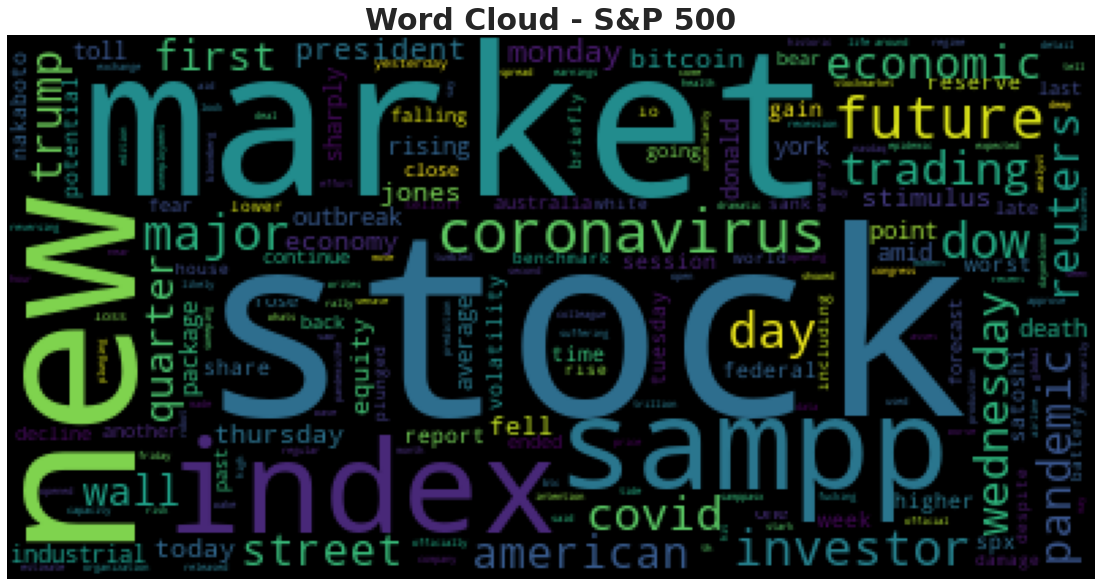

In [359]:
# Generate the S&P 500 word cloud
SP500_wc = WordCloud(collocations=False).generate(SP500_words)
fig = plt.figure()
plt.imshow(SP500_wc)
plt.title('Word Cloud - S&P 500', fontsize=30, fontweight='bold')
plt.axis('off')
plt.show()

In [ ]:
# Generate the S&P 500 by Jim Cramer word cloud

fig = plt.figure()
cramer_SP500_wc = WordCloud().generate(cramer_SP500_words)
plt.imshow(cramer_SP500_wc)
plt.title('Word Cloud - S&P 500 by Jim Cramer', fontsize=30, fontweight='bold')
plt.axis('off')
plt.show()

In [ ]:
# Generate the S&P 500 by Donald Trump word cloud

fig = plt.figure()
potus_SP500_wc = WordCloud().generate(potus_SP500_words)
plt.imshow(potus_SP500_wc)
plt.title('Word Cloud - S&P 500 by The President - Mr. Donald Trump', fontsize=30, fontweight='bold')
plt.axis('off')
plt.show()

# Named Entity Recognition for all chosen options for S&P 500

In this section, we built a named entity recognition model for all options and visualized the tags using SpaCy.

In [360]:
!pip install spacy

!conda install -c conda-forge spacy

!python -m spacy download en_core_web_sm

/bin/sh: 1: conda: not found
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [361]:
import spacy
from spacy import displacy

In [362]:
# Load the spaCy model
#!pnda install -c conda-forge WordCloud
!pip install wordcloud

In [363]:
import en_core_web_sm
nlp = en_core_web_sm.load()

## S&P 500 NER

In [364]:
# Concatenate all of the S&P 500 text together
SP500_sent = []
for sent in SP500_tokens['SP500 Text']:
    sent_list = sent
    SP500_sent.append(sent_list)
    
one_string_SP500 = ' '.join(SP500_sent)
one_string_SP500

'it was another brutal day on wall street as investors continue to come to grips with the new economic realities imposed by the covid-19 outbreak in the u.s. both the dow jones industrial average (djia) and the s&amp;p 500 are scraping near their lowest point … [+1560 chars] the stock market’s movements in recent weeks have often felt like unified action. when one american index fell, the others were generally right there with it, rising and falling in concert. today wasn’t like that.\r\nindeed, in regular trading today the dow jon… [+1870 chars] the first quarter of 2020 ended with a whimper\xa0 with the dow jones industrial average, s&amp;p 500 and nasdaq posting their worst quarter in decades as the covid-19 pandemic continues to cause uncertainty and volatility across all major stock market indices.\r… [+2317 chars] americans are starting to lose their jobs in response to the coronavirus pandemic, and economists expect it\'s only going to get worse from here. and quickly, too.\r\ne

In [365]:
# Run the NER processor on all of the text
SP500_doc = nlp(one_string_SP500)

# Add a title to the document
SP500_doc.user_data['title'] = 'S&P 500 NER'


In [366]:
# Render the visualization
displacy.render(SP500_doc, style='ent')

In [ ]:
# List all Entities
for ent in SP500_doc.ents:
    print (ent, ent.label_)

---

## S&P 500 by Jim Cramer NER 

In [ ]:
# Concatenate all of the Jim Cramer text together
cramer_SP500_sent = []
for sent in cramer_SP500_tokens['Cramer Text']:
    sent_list = sent
    cramer_SP500_sent.append(sent_list)
    
one_string_cramer_SP500 = ' '.join(cramer_SP500_sent)
one_string_cramer_SP500

In [ ]:
# Run the NER processor on all of the text
cramer_SP500_doc = nlp(one_string_cramer_SP500)

# Add a title to the document
cramer_SP500_doc.user_data['title'] = 'S&P 500 NER by Jim Cramer'


In [ ]:
# Render the visualization
displacy.render(cramer_SP500_doc, style='ent')

In [ ]:
# List all Entities
for ent in cramer_SP500_doc.ents:
    print (ent, ent.label_)

## S&P 500 NER by The President Mr. Donald Trump

In [ ]:
# Concatenate all of the Donald Trump text together
potus_SP500_sent = []
for sent in potus_SP500_tokens['Trump Text']:
    sent_list = sent
    potus_SP500_sent.append(sent_list)
    
one_string_potus_SP500 = ' '.join(potus_SP500_sent)
one_string_potus_SP500

In [ ]:
# Run the NER processor on all of the text
potus_SP500_doc = nlp(one_string_potus_SP500)

# Add a title to the document
potus_SP500_doc.user_data['title'] = 'S&P 500 NER by Donald Trump'

In [ ]:
# Render the visualization
displacy.render(potus_SP500_doc, style='ent')

In [ ]:
# List all Entities
for ent in cramer_SP500_doc.ents:
    print (ent, ent.label_)

In [ ]:
# all proper python functions are supposed to contain a doc string explaining
# what the function does, its params, and its return
# this is what is shown when you type help() and a function (or class, or object, etc.)
